In [1]:
from pathlib import Path
from pyfaidx import Fasta
import pandas as pd
import torch
from random import randrange, random
import numpy as np
import os
from transformers import AutoTokenizer
from tqdm import tqdm
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fasta_file = Path("/scratch/kyle/hyena-dna/data/hg38/hg38.ml.fa")
seqs = Fasta(str(fasta_file))

In [3]:
total_count = 0
for chr_name in seqs.keys():
    total_count += len(seqs[chr_name])
    print(chr_name, len(seqs[chr_name]))
print(f"{total_count=}")

chr1 248956422
chr10 133797422
chr11 135086622
chr12 133275309
chr13 114364328
chr14 107043718
chr15 101991189
chr16 90338345
chr17 83257441
chr18 80373285
chr19 58617616
chr2 242193529
chr20 64444167
chr21 46709983
chr22 50818468
chr3 198295559
chr4 190214555
chr5 181538259
chr6 170805979
chr7 159345973
chr8 145138636
chr9 138394717
chrX 156040895
total_count=3031042417


In [4]:
char_frequencies = {}
for chr_name in tqdm(seqs.keys()):
    seq = str(seqs[chr_name][:])
    for char in seq:
        char_frequencies[char] = char_frequencies.get(char, 0) + 1
char_frequencies

100%|███████████████████████████████████████████| 23/23 [05:03<00:00, 13.21s/it]


{'N': 119818347,
 'T': 861982404,
 'A': 859262677,
 'C': 593752927,
 'G': 596226062}

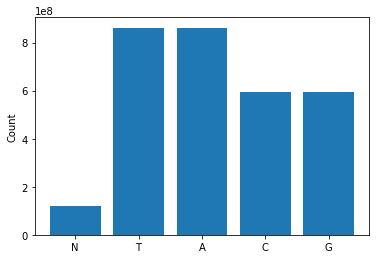

In [5]:
plt.bar(char_frequencies.keys(), char_frequencies.values())
plt.ylabel("Count")
plt.show()

In [6]:
tokenizer = AutoTokenizer.from_pretrained('AIRI-Institute/gena-lm-bert-base')

In [7]:
tokenizer

PreTrainedTokenizerFast(name_or_path='AIRI-Institute/gena-lm-bert-base', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [8]:
chunk_size = int(1e5)
chunk_indicies = []
for chr_name in tqdm(seqs.keys()):
    count_N = 0
    offset_mapping = tokenizer(str(seqs[chr_name][:]), add_special_tokens=False, return_offsets_mapping=True).offset_mapping
    num_chunks = (len(offset_mapping) + chunk_size - 1) // chunk_size
    for i in range(num_chunks):
        start_idx = offset_mapping[i * chunk_size][0]
        end_idx = offset_mapping[min((i+1) * chunk_size, len(offset_mapping)) - 1][1]
        seq = str(seqs[chr_name][start_idx:end_idx])
        if seq.count("N") == len(seq):
            count_N += 1
        else:
            chunk_indicies.append((chr_name, start_idx, end_idx))
    print(f"{chr_name=}", f"{num_chunks=}", f"{count_N=}")

  4%|█▊                                       | 1/23 [05:56<2:10:42, 356.48s/it]

chr_name='chr1' num_chunks=536 count_N=179


  9%|███▌                                     | 2/23 [08:48<1:26:46, 247.92s/it]

chr_name='chr10' num_chunks=210 count_N=2


 13%|█████▎                                   | 3/23 [11:36<1:10:29, 211.47s/it]

chr_name='chr11' num_chunks=211 count_N=1


 17%|███████▏                                 | 4/23 [14:40<1:03:32, 200.68s/it]

chr_name='chr12' num_chunks=204 count_N=0


 22%|█████████▎                                 | 5/23 [17:01<53:44, 179.15s/it]

chr_name='chr13' num_chunks=315 count_N=161


 26%|███████████▏                               | 6/23 [19:13<46:14, 163.18s/it]

chr_name='chr14' num_chunks=303 count_N=163


 30%|█████████████                              | 7/23 [21:14<39:49, 149.36s/it]

chr_name='chr15' num_chunks=303 count_N=170


 35%|██████████████▉                            | 8/23 [22:57<33:38, 134.56s/it]

chr_name='chr16' num_chunks=210 count_N=81


 39%|████████████████▊                          | 9/23 [24:38<28:55, 123.96s/it]

chr_name='chr17' num_chunks=129 count_N=0


 43%|██████████████████▎                       | 10/23 [26:29<26:00, 120.03s/it]

chr_name='chr18' num_chunks=125 count_N=1


 48%|████████████████████                      | 11/23 [27:44<21:15, 106.27s/it]

chr_name='chr19' num_chunks=89 count_N=0


 52%|█████████████████████▉                    | 12/23 [34:39<36:43, 200.30s/it]

chr_name='chr2' num_chunks=385 count_N=11


 57%|███████████████████████▋                  | 13/23 [36:05<27:35, 165.55s/it]

chr_name='chr20' num_chunks=103 count_N=1


 61%|█████████████████████████▌                | 14/23 [37:12<20:23, 135.92s/it]

chr_name='chr21' num_chunks=128 count_N=51


 65%|███████████████████████████▍              | 15/23 [38:14<15:08, 113.59s/it]

chr_name='chr22' num_chunks=176 count_N=105


 70%|█████████████████████████████▏            | 16/23 [44:56<23:21, 200.27s/it]

chr_name='chr3' num_chunks=305 count_N=1


 74%|███████████████████████████████           | 17/23 [49:49<22:48, 228.15s/it]

chr_name='chr4' num_chunks=295 count_N=2


 78%|████████████████████████████████▊         | 18/23 [53:20<18:34, 222.98s/it]

chr_name='chr5' num_chunks=280 count_N=1


 83%|██████████████████████████████████▋       | 19/23 [56:36<14:19, 214.89s/it]

chr_name='chr6' num_chunks=267 count_N=3


 87%|████████████████████████████████████▌     | 20/23 [59:38<10:15, 205.13s/it]

chr_name='chr7' num_chunks=246 count_N=0


 91%|████████████████████████████████████▌   | 21/23 [1:02:23<06:25, 192.92s/it]

chr_name='chr8' num_chunks=223 count_N=1


 96%|██████████████████████████████████████▎ | 22/23 [1:04:51<02:59, 179.44s/it]

chr_name='chr9' num_chunks=352 count_N=152


100%|████████████████████████████████████████| 23/23 [1:08:23<00:00, 178.43s/it]

chr_name='chrX' num_chunks=246 count_N=2


In [9]:
len(chunk_indicies)

4553

In [10]:
all_Ns_count = 0
for chunk in chunk_indicies:
    chr_name, start, end = chunk
    seq = str(seqs[chr_name][start:end])
    if seq.count("N") == len(seq):
        all_Ns_count += 1
assert all_Ns_count == 0

In [11]:
count_per_chr = {}
for chunk in chunk_indicies:
    chr_name = chunk[0]
    count_per_chr[chr_name] = count_per_chr.get(chr_name, 0) + 1
count_per_chr = dict(sorted(count_per_chr.items()))
count_per_chr

{'chr1': 357,
 'chr10': 208,
 'chr11': 210,
 'chr12': 204,
 'chr13': 154,
 'chr14': 140,
 'chr15': 133,
 'chr16': 129,
 'chr17': 129,
 'chr18': 124,
 'chr19': 89,
 'chr2': 374,
 'chr20': 102,
 'chr21': 77,
 'chr22': 71,
 'chr3': 304,
 'chr4': 293,
 'chr5': 279,
 'chr6': 264,
 'chr7': 246,
 'chr8': 222,
 'chr9': 200,
 'chrX': 244}

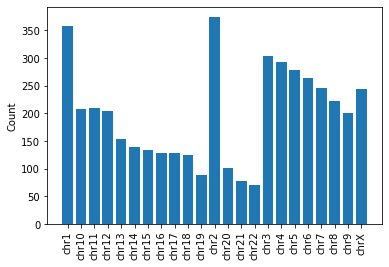

In [12]:
plt.bar(count_per_chr.keys(), count_per_chr.values())
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [13]:
import random
random.seed(2222)
random.shuffle(chunk_indicies)

total_size = len(chunk_indicies)
train_end = int(0.8 * total_size)
val_end = train_end + int(0.1 * total_size)

for i, chunk in enumerate(chunk_indicies):
    if i < train_end:
        split = "train"
    elif i < val_end:
        split = "valid"
    else:
        split = "test"
    chunk_indicies[i] = (*chunk, split)

In [14]:
with open("/scratch/kyle/hyena-dna/data/hg38/sequences_100k.bed", "w") as f:
    for chunk in chunk_indicies:
        chr_name, start, end, split = chunk
        f.write(f"{chr_name}\t{start}\t{end}\t{split}\n")

In [15]:
for chunk in chunk_indicies:
    chr_name, start, end, split = chunk
    seq = str(seqs[chr_name][start:end])
    assert seq.count("N") != len(seq)